In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hospital-dataset-for-practice/hospital data analysis.csv


In [28]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df= pd.read_csv('/kaggle/input/hospital-dataset-for-practice/hospital data analysis.csv')

In [30]:
df

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4
...,...,...,...,...,...,...,...,...,...,...
979,996,68,Male,Hypertension,Medication and Counseling,1000,70,No,Stable,4
980,997,45,Female,Appendicitis,Appendectomy,8000,72,No,Recovered,3
981,998,40,Male,Fractured Leg,Cast and Physical Therapy,3000,72,No,Recovered,4
982,999,78,Female,Heart Attack,Cardiac Catheterization,18000,74,Yes,Stable,2


In [31]:
df.head()

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_ID      984 non-null    int64 
 1   Age             984 non-null    int64 
 2   Gender          984 non-null    object
 3   Condition       984 non-null    object
 4   Procedure       984 non-null    object
 5   Cost            984 non-null    int64 
 6   Length_of_Stay  984 non-null    int64 
 7   Readmission     984 non-null    object
 8   Outcome         984 non-null    object
 9   Satisfaction    984 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 77.0+ KB


In [33]:
df.describe()

,Patient_ID,Age,Cost,Length_of_Stay,Satisfaction
count,984.000000,984.000000,984.000000,984.000000,984.000000
mean,500.329268,53.754065,8367.479675,37.663618,3.598577
std,288.979531,14.941135,7761.990976,19.595805,0.883002
min,1.000000,25.000000,100.000000,1.000000,2.000000
25%,250.750000,45.000000,1000.000000,21.000000,3.000000
50%,500.500000,55.000000,6000.000000,38.000000,4.000000
75%,750.250000,65.000000,15000.000000,54.250000,4.000000
max,1000.000000,78.000000,25000.000000,76.000000,5.000000


count: Indicates the number of non-null values in each column.
mean: Represents the average value of each column.
std: Shows the standard deviation, which measures the dispersion or spread of values around the mean.
min: Displays the minimum value in each column.
25% (1st quartile): Represents the value below which 25% of the data falls. Also known as the first quartile.
50% (2nd quartile or median): Represents the value below which 50% of the data falls. Also known as the median.
75% (3rd quartile): Represents the value below which 75% of the data falls. Also known as the third quartile.
max: Displays the maximum value in each column.

Here's what we can interpret from the df.describe() output for your dataset:
Patient_ID:
There are 984 unique patient IDs, ranging from 1 to 1000.

Age:
The average age of patients is approximately 53.75 years, with a standard deviation of approximately 14.94.
The youngest patient is 25 years old, and the oldest is 78 years old.
25% of the patients are 45 years old or younger, while 75% are 65 years old or younger.

Cost:
The average cost of medical procedures is approximately 8367.48 units, with a standard deviation of approximately 7761.99.
The least expensive procedure costs 100 units, while the most expensive costs 25000 units.
25% of the procedures cost 1000 units or less, while 75% cost 15000 units or less.

Length_of_Stay:
The average length of stay in the hospital is approximately 37.66 days, with a standard deviation of approximately 19.60.
The shortest stay is 1 day, and the longest stay is 76 days.
25% of the patients stayed for 21 days or less, while 75% stayed for 54.25 days or less.

Satisfaction:
Patient satisfaction ratings range from 2 to 5.
The average satisfaction rating is approximately 3.60, with a standard deviation of approximately 0.88.
25% of patients rated their satisfaction as 3 or lower, while 75% rated it as 4 or higher.

# **DATA CLEANING**

In [34]:
df.isna().sum()

Patient_ID        0
Age               0
Gender            0
Condition         0
Procedure         0
Cost              0
Length_of_Stay    0
Readmission       0
Outcome           0
Satisfaction      0
dtype: int64

There is no null values in any column.

# **DATA ANALYSIS AND VISUALIZATION**

In [35]:
df.shape

(984, 10)

In [36]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Condition', 'Procedure', 'Cost',
       'Length_of_Stay', 'Readmission', 'Outcome', 'Satisfaction'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



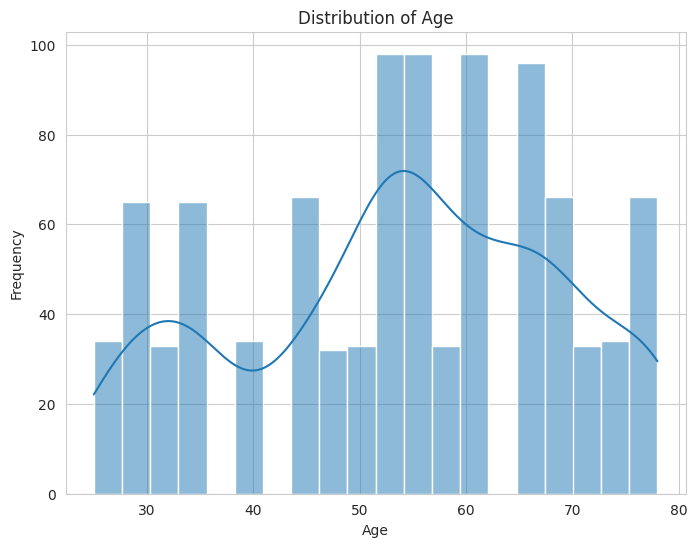

Summary Statistics for Age:
count    984.000000
mean      53.754065
std       14.941135
min       25.000000
25%       45.000000
50%       55.000000
75%       65.000000
max       78.000000
Name: Age, dtype: float64


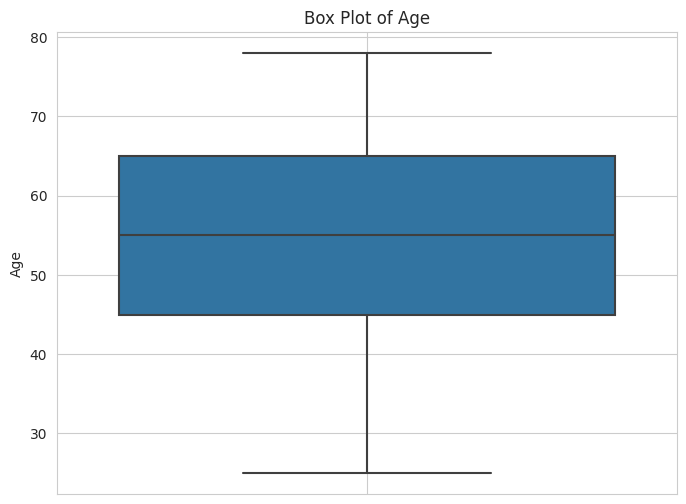

In [48]:
# 1. Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Summary Statistics
age_summary = df['Age'].describe()
print("Summary Statistics for Age:")
print(age_summary)

# 3. Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Age')
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



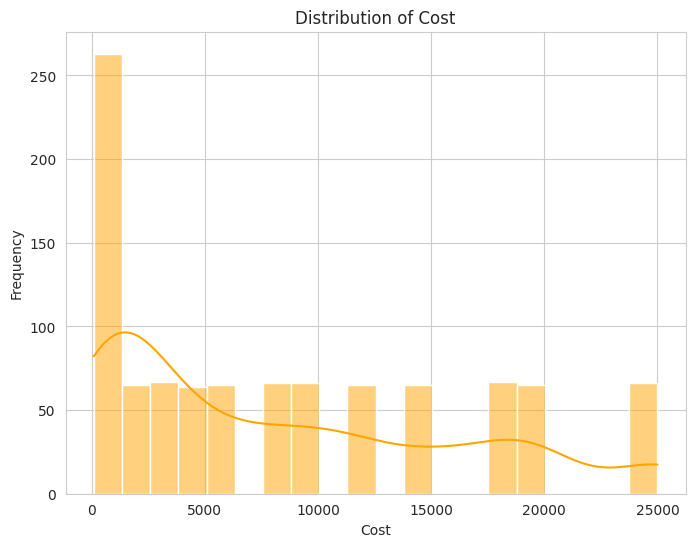

Summary Statistics for Cost:
count      984.000000
mean      8367.479675
std       7761.990976
min        100.000000
25%       1000.000000
50%       6000.000000
75%      15000.000000
max      25000.000000
Name: Cost, dtype: float64


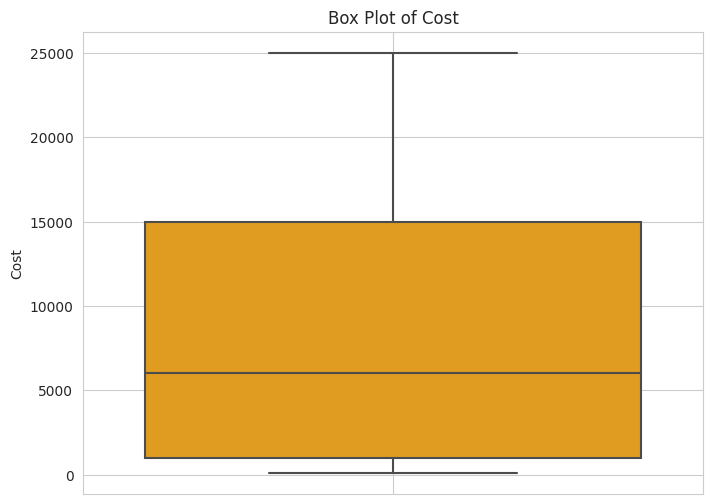

In [50]:
# 1. Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Cost'], bins=20, kde=True, color='orange')
plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Summary Statistics
cost_summary = df['Cost'].describe()
print("Summary Statistics for Cost:")
print(cost_summary)

# 3. Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Cost', color='orange')
plt.title('Box Plot of Cost')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



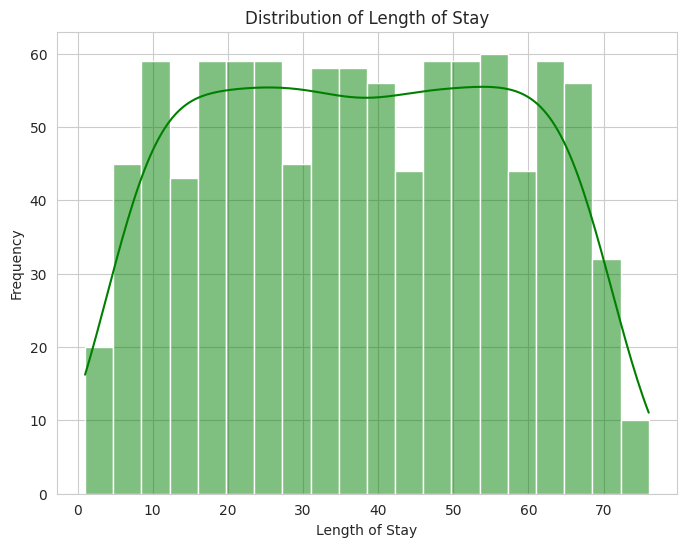

Summary Statistics for Length of Stay:
count    984.000000
mean      37.663618
std       19.595805
min        1.000000
25%       21.000000
50%       38.000000
75%       54.250000
max       76.000000
Name: Length_of_Stay, dtype: float64


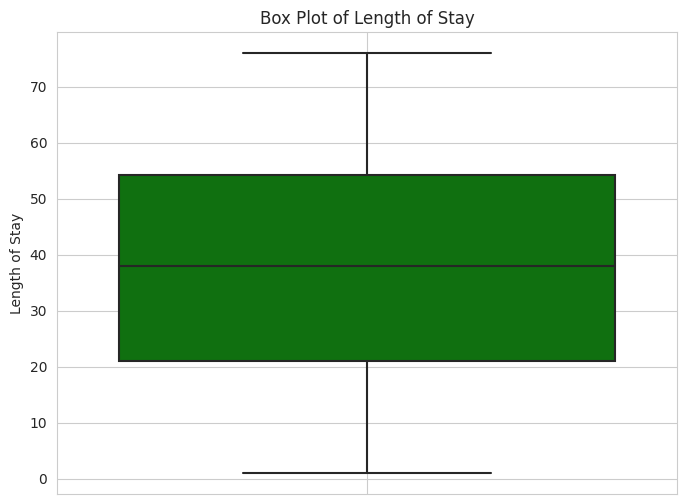

In [51]:
sns.set_palette("husl")

# 1. Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Length_of_Stay'], bins=20, kde=True, color='green')
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Summary Statistics
los_summary = df['Length_of_Stay'].describe()
print("Summary Statistics for Length of Stay:")
print(los_summary)

# 3. Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Length_of_Stay', color='green')
plt.title('Box Plot of Length of Stay')
plt.ylabel('Length of Stay')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



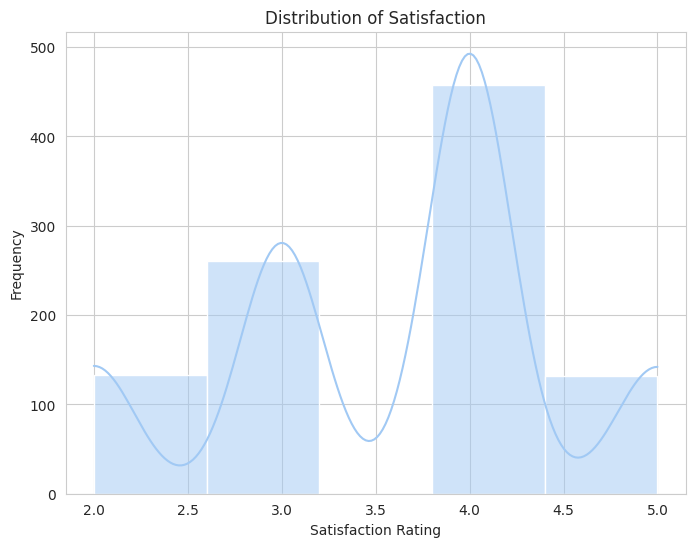

Summary Statistics for Satisfaction:
count    984.000000
mean       3.598577
std        0.883002
min        2.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Satisfaction, dtype: float64


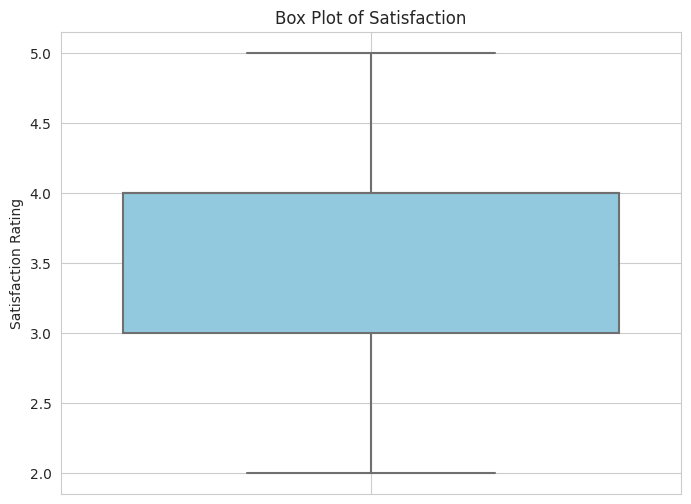

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette
sns.set_palette("pastel")

# 1. Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Satisfaction'], bins=5, kde=True)
plt.title('Distribution of Satisfaction')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Summary Statistics
satisfaction_summary = df['Satisfaction'].describe()
print("Summary Statistics for Satisfaction:")
print(satisfaction_summary)

# 3. Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Satisfaction', color='skyblue')
plt.title('Box Plot of Satisfaction')
plt.ylabel('Satisfaction Rating')
plt.grid(True)
plt.show()


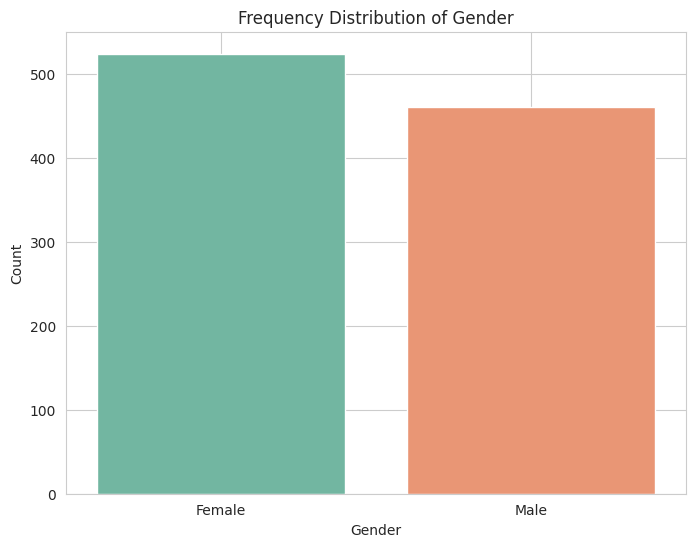

In [54]:
sns.set_palette("pastel")

# 1. Count Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Frequency Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()


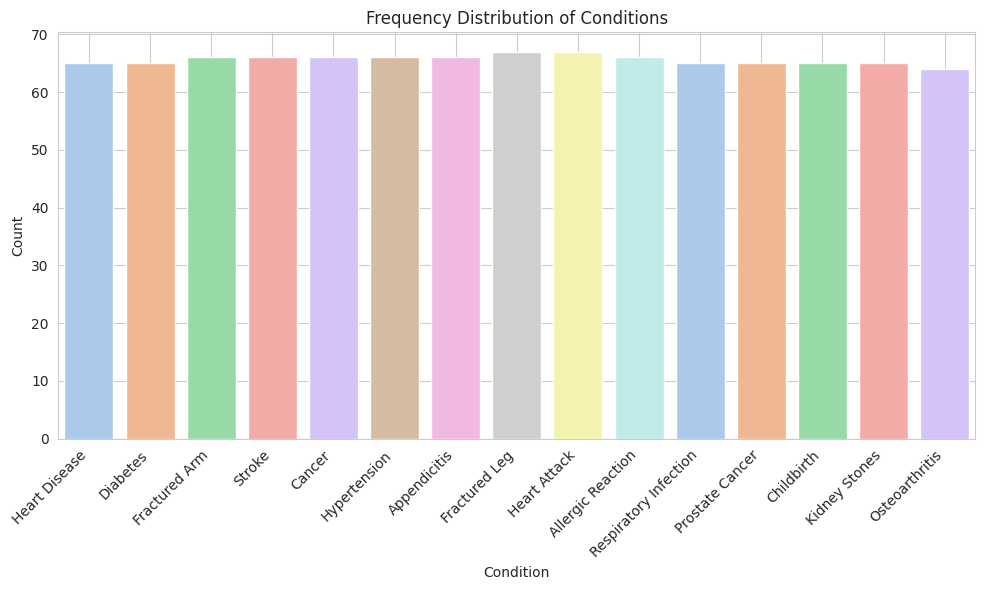

In [55]:
sns.set_palette("husl")

# 1. Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Condition', palette='pastel')
plt.title('Frequency Distribution of Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()


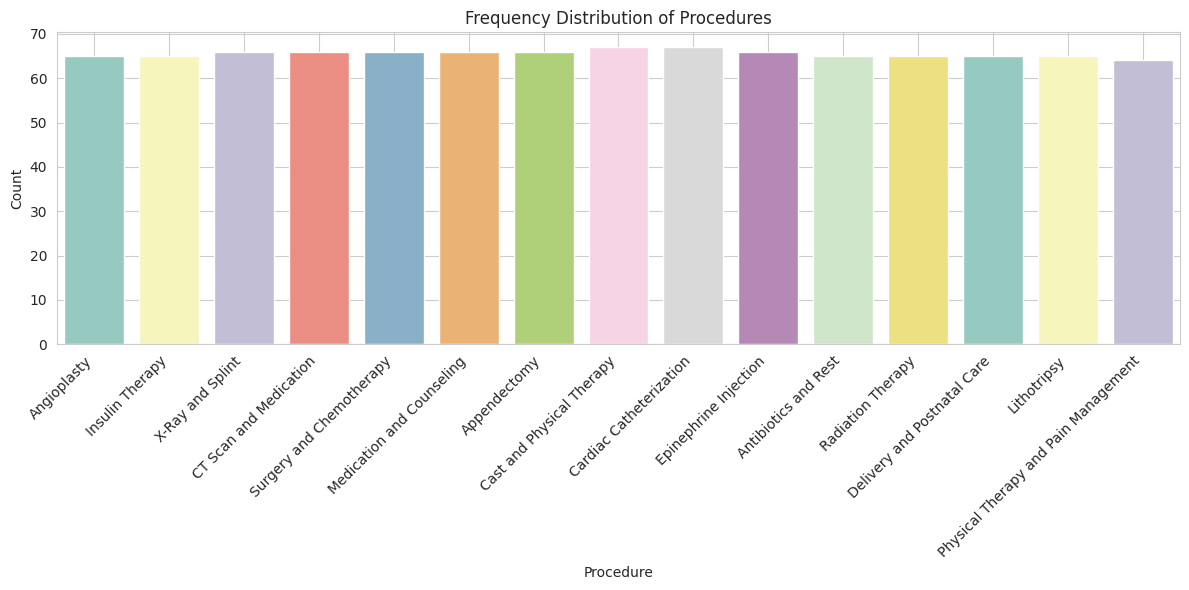

In [58]:
sns.set_palette("pastel")

# 1. Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Procedure', palette='Set3')
plt.title('Frequency Distribution of Procedures')
plt.xlabel('Procedure')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()


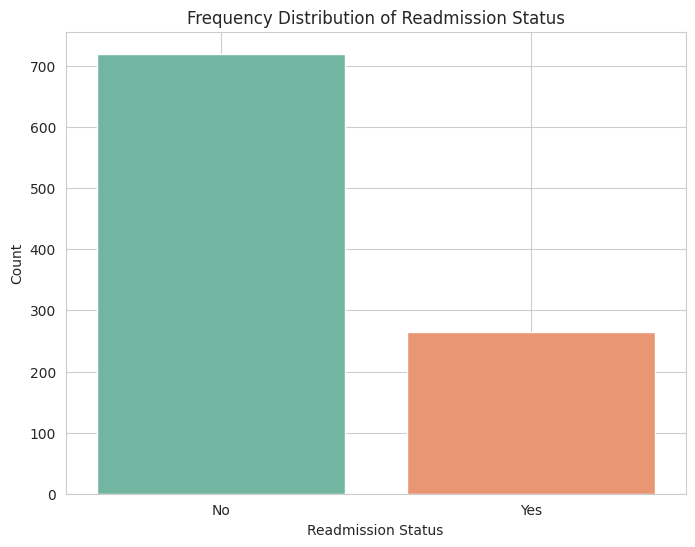

In [59]:
sns.set_palette("pastel")

# 1. Count Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Readmission', palette='Set2')
plt.title('Frequency Distribution of Readmission Status')
plt.xlabel('Readmission Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()


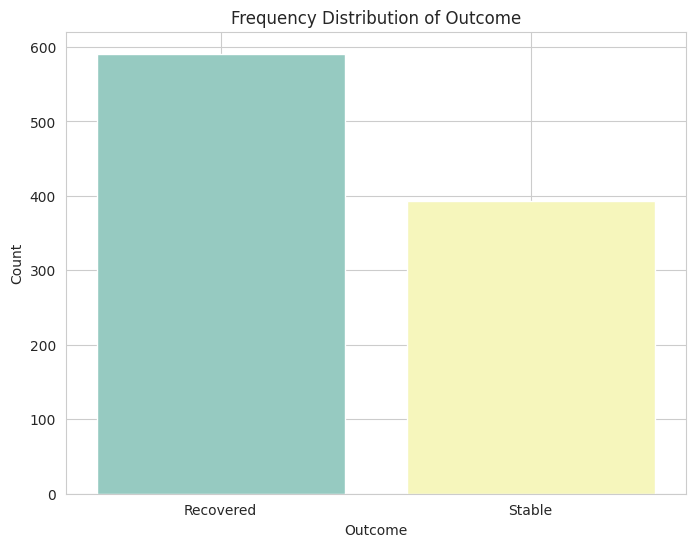

In [61]:
sns.set_palette("pastel")

# 1. Count Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Outcome', palette='Set3')
plt.title('Frequency Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.grid(True)
plt.show()


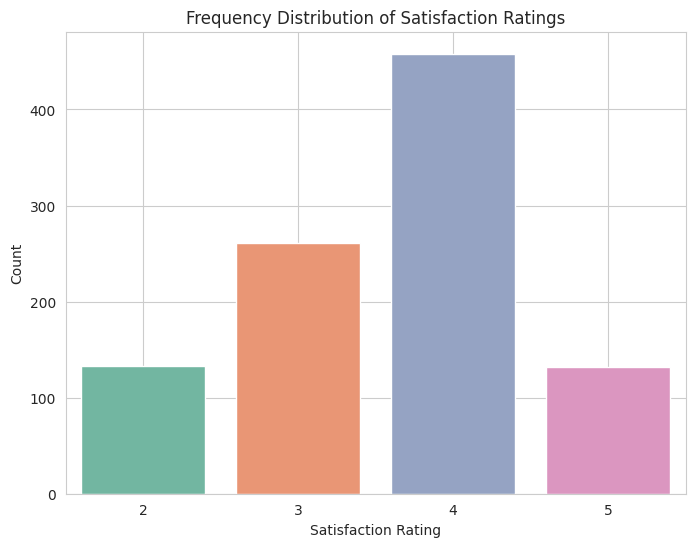

In [62]:
sns.set_palette("pastel")

# 1. Count Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Satisfaction', palette='Set2')
plt.title('Frequency Distribution of Satisfaction Ratings')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()


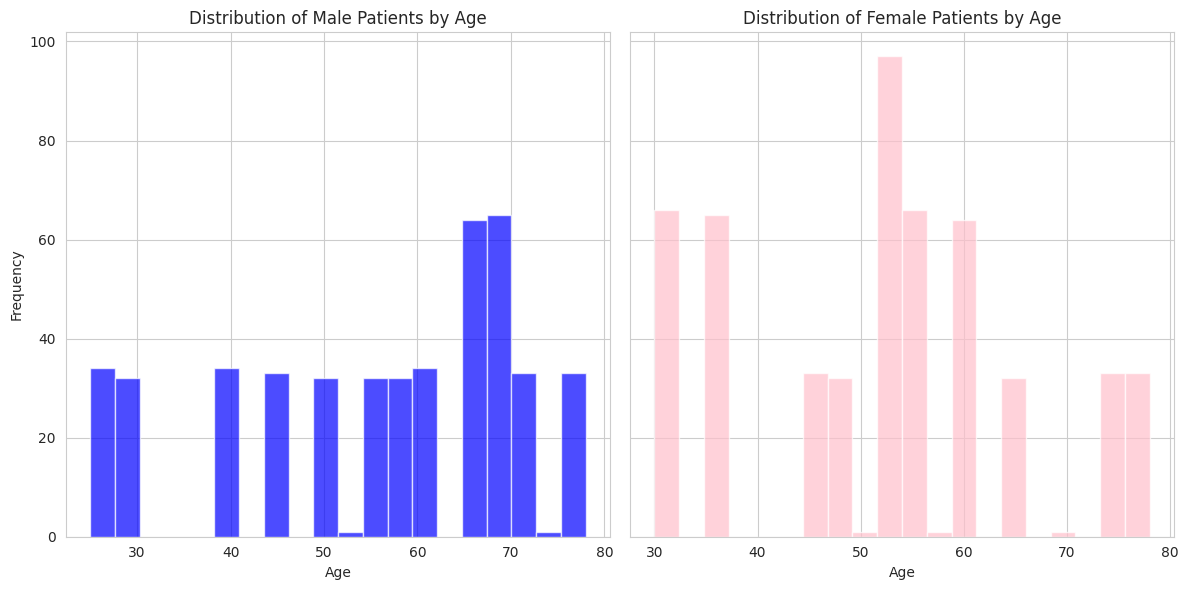

In [65]:
# Create subplots for male and female patients
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Plot histogram for male patients
ax1.hist(df[df['Gender'] == 'Male']['Age'], bins=20, color='blue', alpha=0.7)
ax1.set_title('Distribution of Male Patients by Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')

# Plot histogram for female patients
ax2.hist(df[df['Gender'] == 'Female']['Age'], bins=20, color='pink', alpha=0.7)
ax2.set_title('Distribution of Female Patients by Age')
ax2.set_xlabel('Age')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


We create two subplots side by side, one for male patients and the other for female patients.
Each subplot represents the distribution of patients' ages.
We use plt.hist() to plot histograms for male and female patients separately.
The bins parameter controls the number of bins in the histogram, helping to display the distribution clearly.
We set titles and labels for each subplot to provide clear context.
Finally, we use plt.tight_layout() to adjust the layout for better visualization.

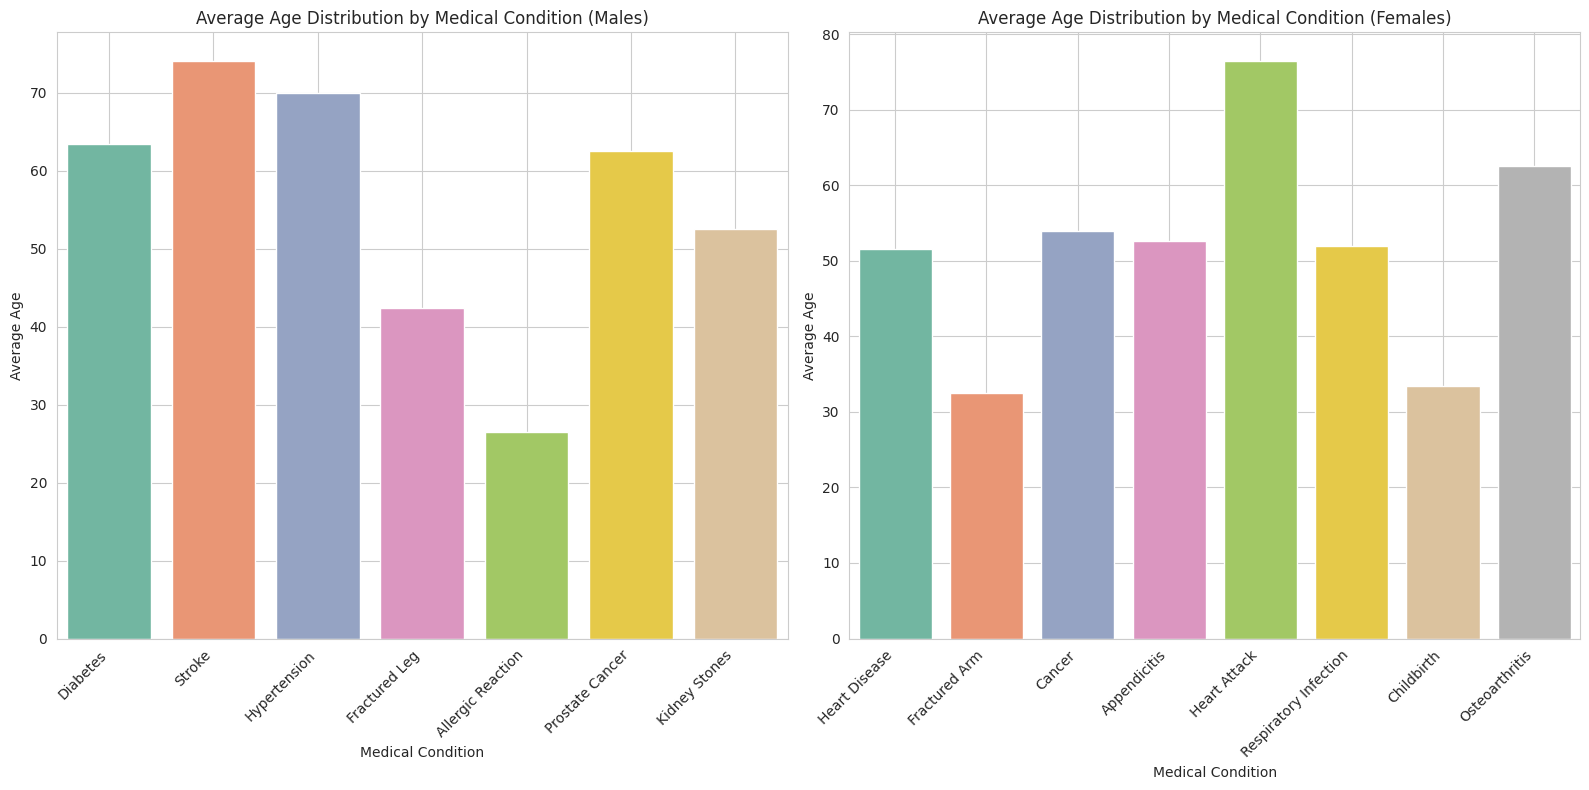

In [76]:
# Set up the figure and axes for males
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)  # Subplot for males

# Create grouped bar chart for males
sns.barplot(data=df[df['Gender'] == 'Male'], x='Condition', y='Age', palette='Set2', errorbar=None)
plt.title('Average Age Distribution by Medical Condition (Males)')
plt.xlabel('Medical Condition')
plt.ylabel('Average Age')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Set up the figure and axes for females
plt.subplot(1, 2, 2)  # Subplot for females

# Create grouped bar chart for females
sns.barplot(data=df[df['Gender'] == 'Female'], x='Condition', y='Age', palette='Set2', errorbar=None)
plt.title('Average Age Distribution by Medical Condition (Females)')
plt.xlabel('Medical Condition')
plt.ylabel('Average Age')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Show the plots
plt.show()


We use subplot() to create two subplots side by side, one for males and one for females.
For each subplot:
We filter the dataset based on the gender ('Male' or 'Female').
We create a grouped bar chart using sns.barplot() to display the average age distribution by medical condition.
The x-axis represents the medical conditions, and the y-axis represents the average age.
We set titles, labels, rotate x-axis labels, and enable grid lines for better visualization.
Finally, we display the plots using plt.show().

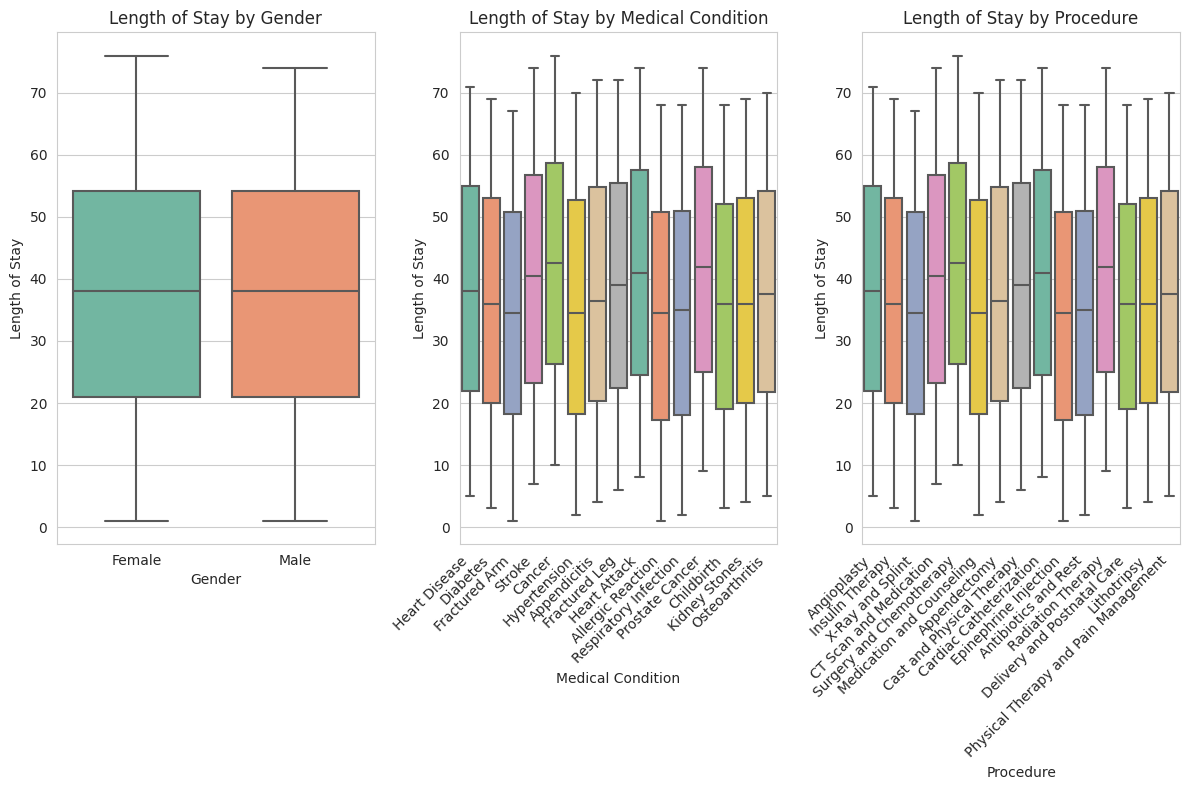

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Create a box plot for length of stay based on gender
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='Gender', y='Length_of_Stay', palette='Set2')
plt.title('Length of Stay by Gender')
plt.xlabel('Gender')
plt.ylabel('Length of Stay')

# Create a box plot for length of stay based on medical condition
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Condition', y='Length_of_Stay', palette='Set2')
plt.title('Length of Stay by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Length of Stay')
plt.xticks(rotation=45, ha='right')

# Create a box plot for length of stay based on procedure
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Procedure', y='Length_of_Stay', palette='Set2')
plt.title('Length of Stay by Procedure')
plt.xlabel('Procedure')
plt.ylabel('Length of Stay')
plt.xticks(rotation=45, ha='right')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In this code:

We use subplot() to create three subplots: one for each category (gender, medical condition, procedure).
For each subplot:
We use sns.boxplot() to create a box plot showing the distribution of lengths of stay.
The x-axis represents the categories (gender, medical condition, procedure), and the y-axis represents the length of stay.
We set titles, labels, and adjust the layout for better visualization.
Finally, we use plt.show() to display the plots.

Proportion of patients readmitted: 0.27


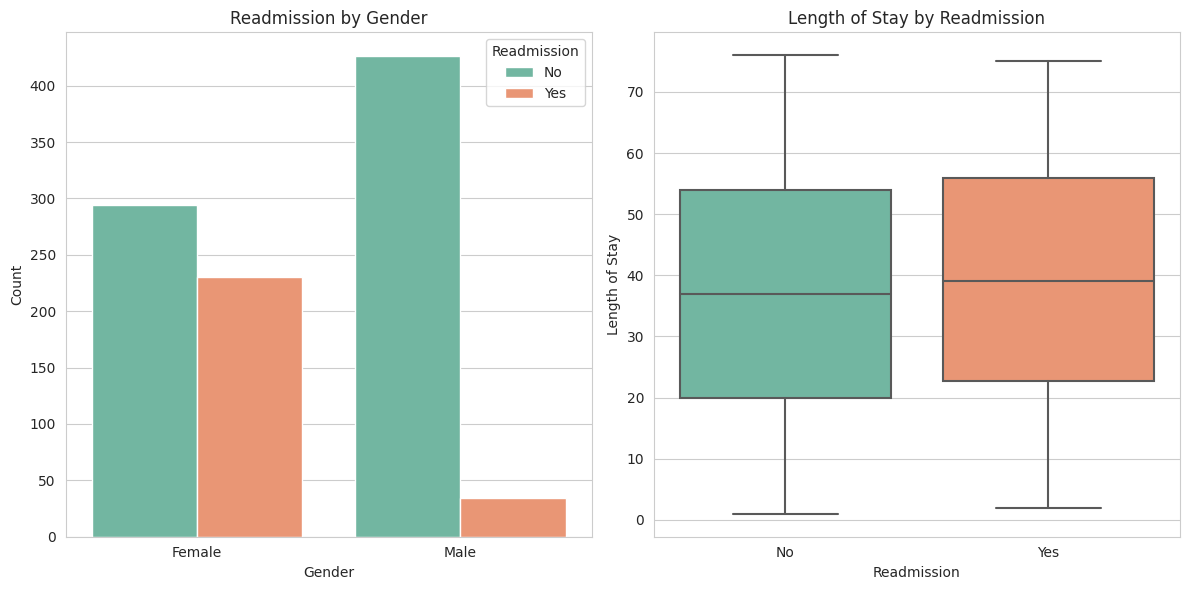

In [78]:
# Calculate proportion of patients readmitted
total_patients = len(df)
readmitted_patients = df['Readmission'].value_counts()['Yes']
proportion_readmitted = readmitted_patients / total_patients

print(f"Proportion of patients readmitted: {proportion_readmitted:.2f}")

# Visualize potential predictors of readmission
plt.figure(figsize=(12, 6))

# Bar plot of readmission by gender
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Gender', hue='Readmission', palette='Set2')
plt.title('Readmission by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Box plot of length of stay by readmission status
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Readmission', y='Length_of_Stay', palette='Set2')
plt.title('Length of Stay by Readmission')
plt.xlabel('Readmission')
plt.ylabel('Length of Stay')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In this code:

We calculate the proportion of patients who are readmitted by counting the number of 'Yes' values in the 'Readmission' column and dividing it by the total number of patients.
We visualize potential predictors of readmission using Seaborn's countplot and boxplot.
The count plot shows the distribution of readmission status by gender, while the box plot displays the distribution of the length of stay for readmitted and non-readmitted patients.
By examining these visualizations, we can identify any patterns or predictors of readmission within the dataset.





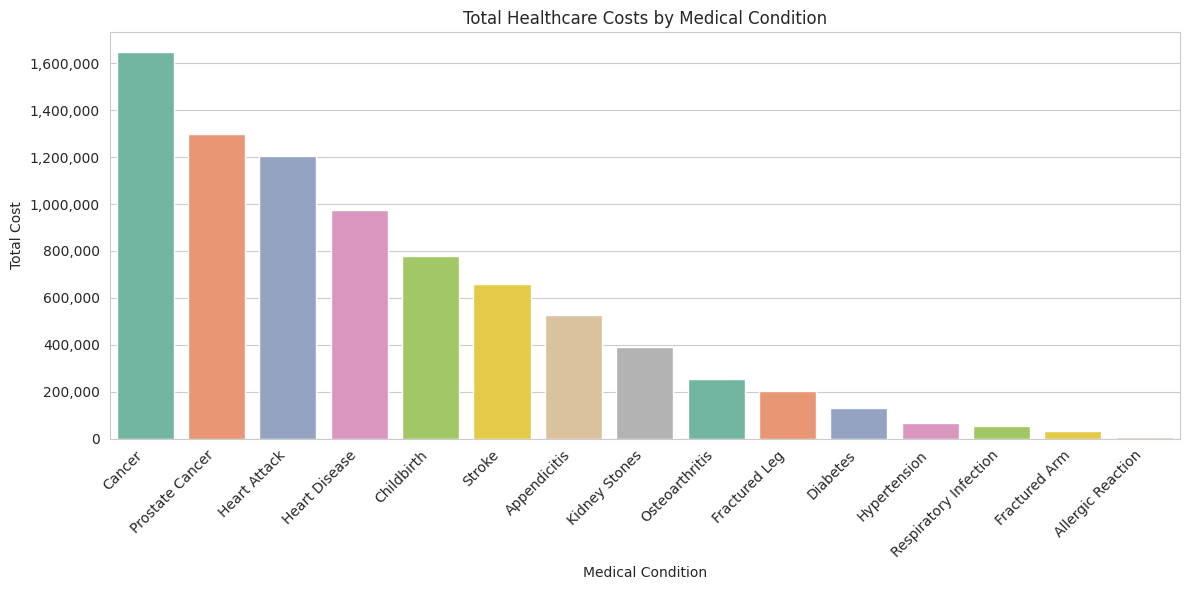

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Calculate total costs for each medical condition
total_costs = df.groupby('Condition')['Cost'].sum().reset_index()

# Sort the data by total costs in descending order
total_costs = total_costs.sort_values(by='Cost', ascending=False)

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Create a bar plot of total costs by medical condition
sns.barplot(data=total_costs, x='Condition', y='Cost', palette='Set2')
plt.title('Total Healthcare Costs by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Total Cost')
plt.xticks(rotation=45, ha='right')

# Add comma separator and increase font size for y-axis labels
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


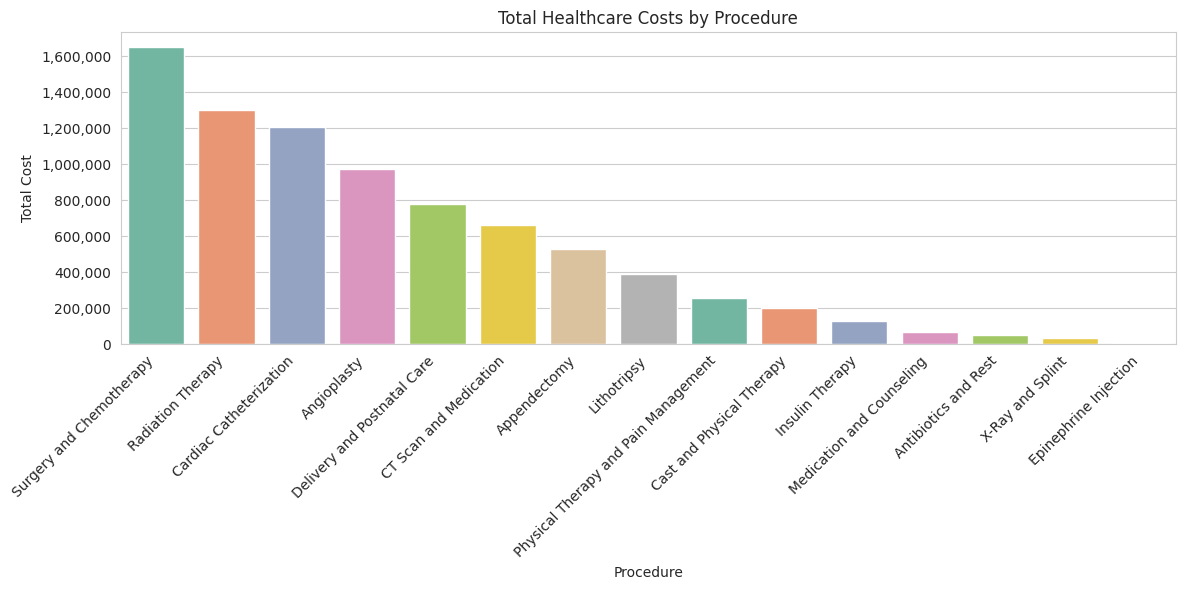

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Calculate total costs for each procedure
total_costs_procedures = df.groupby('Procedure')['Cost'].sum().reset_index()

# Sort the data by total costs in descending order
total_costs_procedures = total_costs_procedures.sort_values(by='Cost', ascending=False)

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Create a bar plot of total costs by procedure
sns.barplot(data=total_costs_procedures, x='Procedure', y='Cost', palette='Set2')
plt.title('Total Healthcare Costs by Procedure')
plt.xlabel('Procedure')
plt.ylabel('Total Cost')
plt.xticks(rotation=45, ha='right')

# Add comma separator and increase font size for y-axis labels
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


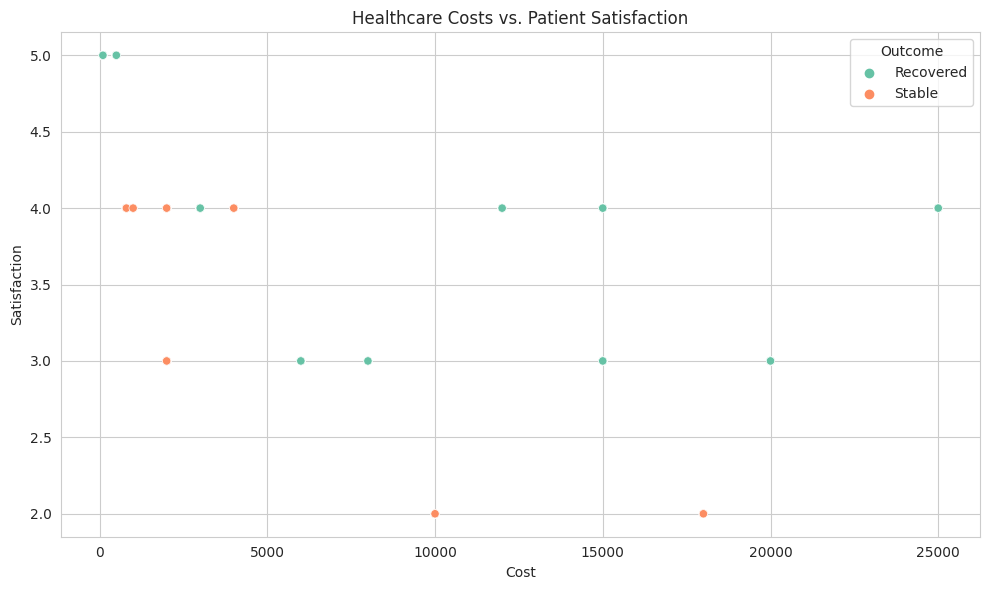

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create scatter plots for healthcare costs vs. patient satisfaction levels
sns.scatterplot(data=df, x='Cost', y='Satisfaction', hue='Outcome', palette='Set2')
plt.title('Healthcare Costs vs. Patient Satisfaction')
plt.xlabel('Cost')
plt.ylabel('Satisfaction')

# Show the plot
plt.legend(title='Outcome')
plt.grid(True)
plt.tight_layout()
plt.show()


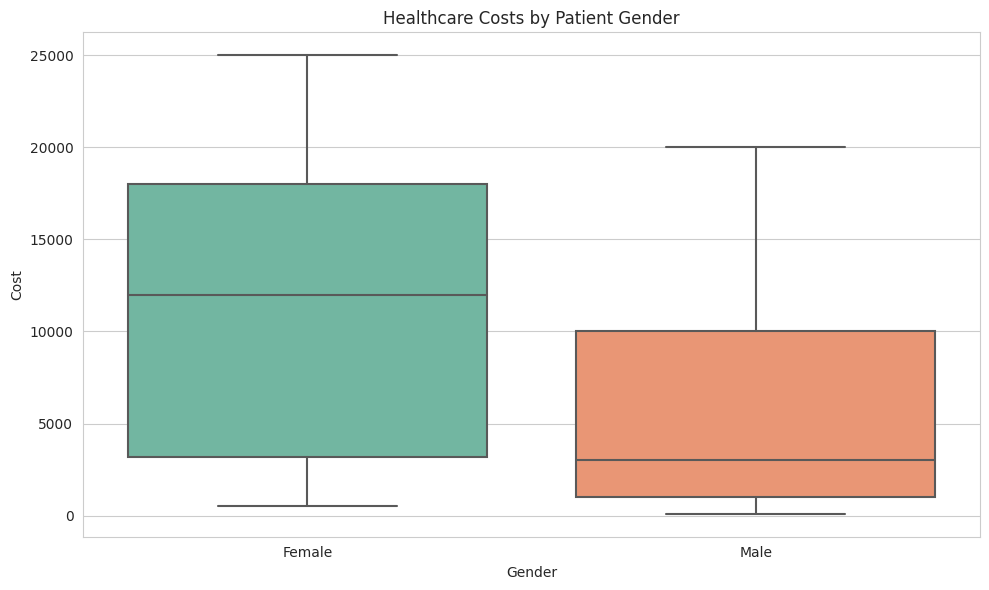

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create a box plot of healthcare costs by patient gender
sns.boxplot(data=df, x='Gender', y='Cost', palette='Set2')
plt.title('Healthcare Costs by Patient Gender')
plt.xlabel('Gender')
plt.ylabel('Cost')

# Show the plot
plt.tight_layout()
plt.show()


This code creates a box plot showing how healthcare costs vary between male and female patients. You can modify the 'x' parameter to explore other demographic variables like age.




/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



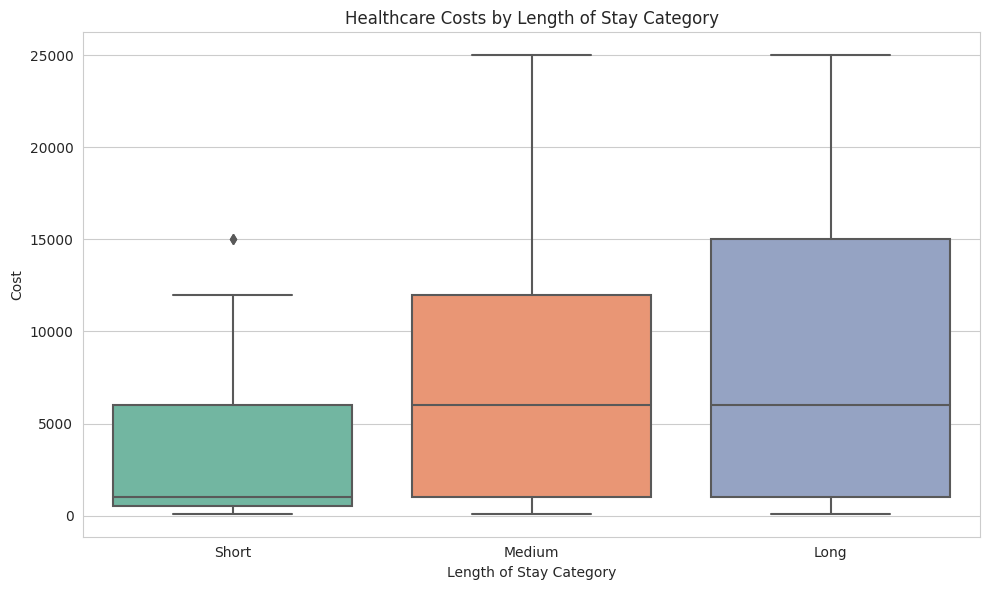

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the length of stay categories
length_categories = ['Short', 'Medium', 'Long']

# Create a new column in the DataFrame to represent the length of stay category
df['Length_Category'] = pd.cut(df['Length_of_Stay'], bins=[0, 7, 14, df['Length_of_Stay'].max()], labels=length_categories, right=False)

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create a box plot of healthcare costs by length of stay category
sns.boxplot(data=df, x='Length_Category', y='Cost', palette='Set2', order=length_categories)
plt.title('Healthcare Costs by Length of Stay Category')
plt.xlabel('Length of Stay Category')
plt.ylabel('Cost')

# Show the plot
plt.tight_layout()
plt.show()


We define three categories for length of stay: 'Short', 'Medium', and 'Long'.
We use the pd.cut() function to categorize the length of stay values into these categories based on specified bins.
We create a box plot of healthcare costs grouped by the length of stay category.
The x-axis now represents the length of stay categories, making it easier to compare healthcare costs across different categories.
This visualization helps to identify any patterns or trends in healthcare costs based on the length of stay category, providing clearer insights into the data.

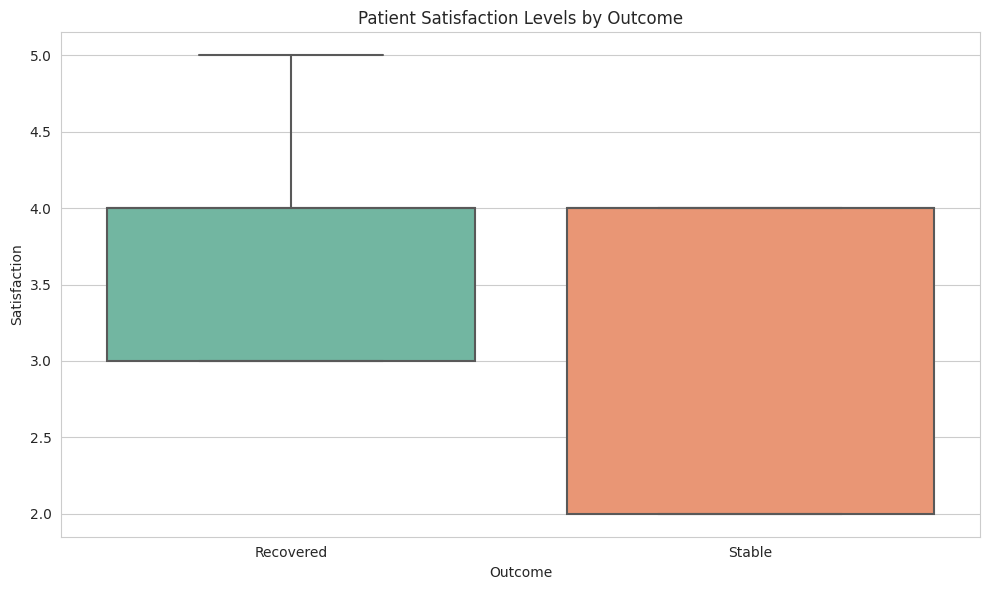

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create a box plot of patient satisfaction levels by outcome
sns.boxplot(data=df, x='Outcome', y='Satisfaction', palette='Set2')
plt.title('Patient Satisfaction Levels by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Satisfaction')

# Show the plot
plt.tight_layout()
plt.show()


We use Seaborn's boxplot() function to create a box plot showing patient satisfaction levels grouped by outcome.
The x-axis represents the different outcomes (e.g., 'Recovered', 'Stable', etc.).
The y-axis represents patient satisfaction levels.
The box plot helps visualize the distribution of patient satisfaction levels for each outcome category.
By observing the box plots, you can identify any patterns or trends in patient satisfaction levels based on their outcomes or experiences during the hospital stay.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Angioplasty'),
  Text(1, 0, 'Antibiotics and Rest'),
  Text(2, 0, 'Appendectomy'),
  Text(3, 0, 'CT Scan and Medication'),
  Text(4, 0, 'Cardiac Catheterization'),
  Text(5, 0, 'Cast and Physical Therapy'),
  Text(6, 0, 'Delivery and Postnatal Care'),
  Text(7, 0, 'Epinephrine Injection'),
  Text(8, 0, 'Insulin Therapy'),
  Text(9, 0, 'Lithotripsy'),
  Text(10, 0, 'Medication and Counseling'),
  Text(11, 0, 'Physical Therapy and Pain Management'),
  Text(12, 0, 'Radiation Therapy'),
  Text(13, 0, 'Surgery and Chemotherapy'),
  Text(14, 0, 'X-Ray and Splint')])

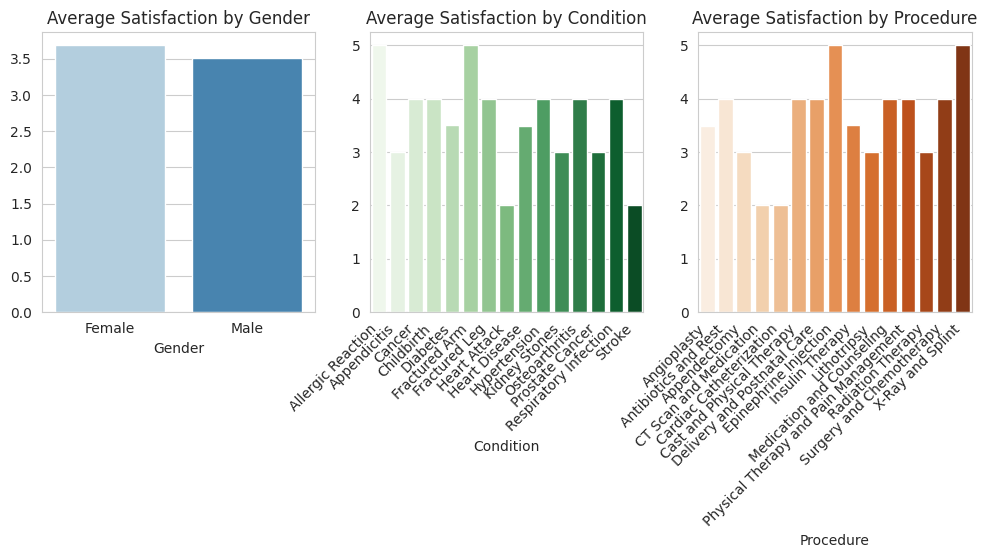

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average satisfaction level by categorical variables
avg_satisfaction_by_gender = df.groupby('Gender')['Satisfaction'].mean()
avg_satisfaction_by_condition = df.groupby('Condition')['Satisfaction'].mean()
avg_satisfaction_by_procedure = df.groupby('Procedure')['Satisfaction'].mean()
avg_satisfaction_by_readmission = df.groupby('Readmission')['Satisfaction'].mean()
avg_satisfaction_by_outcome = df.groupby('Outcome')['Satisfaction'].mean()

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Create bar charts for average satisfaction level by gender, condition, procedure, readmission, and outcome
plt.subplot(2, 3, 1)
sns.barplot(x=avg_satisfaction_by_gender.index, y=avg_satisfaction_by_gender.values, palette='Blues')
plt.title('Average Satisfaction by Gender')

plt.subplot(2, 3, 2)
sns.barplot(x=avg_satisfaction_by_condition.index, y=avg_satisfaction_by_condition.values, palette='Greens')
plt.title('Average Satisfaction by Condition')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 3, 3)
sns.barplot(x=avg_satisfaction_by_procedure.index, y=avg_satisfaction_by_procedure.values, palette='Oranges')
plt.title('Average Satisfaction by Procedure')
plt.xticks(rotation=45, ha='right')


We calculate the average satisfaction level (Satisfaction) for different categorical variables using groupby() and mean() functions.
Bar charts are created for average satisfaction level by gender, condition, procedure, readmission, and outcome.
Each bar chart is displayed in a subplot for better comparison.
We use different color palettes for each bar chart to differentiate between them visually.
Adjustments are made to the layout using plt.tight_layout() to ensure proper spacing between the subplots.

